In [14]:
import math
from itertools import permutations
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import nltk.tag
from nltk.tag import brill
import cPickle as pickle
%matplotlib inline

In [2]:
import nltk.corpus, nltk.tag, itertools
from nltk.tag import brill

In [3]:
from nltk.corpus import brown
#brown.categories()

In [4]:
brown_sents = nltk.corpus.brown.tagged_sents()
brown_train =list(brown_sents[:50000])
brown_test =list(brown_sents[50000:57000])

In [51]:
#brown_train = list(itertools.chain(rev_sents[:1000], fic_sents[:1000], my_sents[:1000]))
#brown_test = list(itertools.chain(rev_sents[1000:2000], fic_sents[1000:2000], my_sents[1000:2000]))

In [18]:
conll_sents = nltk.corpus.conll2000.tagged_sents()
conll_train = list(conll_sents[:4000])
conll_test = list(conll_sents[4000:8000])

In [19]:
treebank_sents = nltk.corpus.treebank.tagged_sents()
treebank_train = list(treebank_sents[:1500])
treebank_test = list(treebank_sents[1500:3000])

In [7]:
def backoff_tagger(tagged_sents, tagger_classes, backoff=None):
    if not backoff:
        backoff = tagger_classes[0](tagged_sents)
        del tagger_classes[0]
 
    for cls in tagger_classes:
        tagger = cls(tagged_sents, backoff=backoff)
        backoff = tagger
 
    return backoff

In [8]:
def train_tagger(cps, inp):
    out = []
    for i in inp:
        tmp = backoff_tagger(cps, i)
        out.append(tmp)
    return out   

In [9]:
def tagger_eval(cps, tagger):
    out = []
    for t in tagger:
        out.append(t.evaluate(cps))
    return out

In [274]:
ntag = []
for i in permutations([nltk.UnigramTagger, nltk.BigramTagger, nltk.TrigramTagger],3):
    ntag.append(list(i))

In [275]:
brown_tagger = train_tagger(brown_train, ntag)

In [128]:
conll_tagger = train_tagger(conll_train, ntag)

In [129]:
treebank_tagger = train_tagger(treebank_train, ntag)

In [276]:
tagger_eval(brown_test, brown_tagger)

[0.895034500911877,
 0.8884953090040799,
 0.7918137890837986,
 0.7683682102769473,
 0.6542839415646681,
 0.6368924737247824]

In [131]:
tagger_eval(conll_test, conll_tagger)

[0.13830257370735916,
 0.08394536922073276,
 0.8674424966855363,
 0.27471116816431324,
 0.871903870030935,
 0.49753782697447335]

In [132]:
tagger_eval(treebank_test, treebank_tagger)

[0.05166903409090909,
 0.08035714285714286,
 0.05166903409090909,
 0.7950487012987013,
 0.08035714285714286,
 0.7950487012987013]

so the two best one are ubt an utb the others are not even close

Add an affixe tagger

In [284]:
ntag = []
for i in permutations([nltk.tag.UnigramTagger, nltk.tag.BigramTagger, nltk.tag.TrigramTagger, nltk.tag.AffixTagger],4):
    ntag.append(list(i))

In [285]:
brown_tagger = train_tagger(brown_train, ntag)
conll_tagger = train_tagger(conll_train, ntag)
treebank_tagger = train_tagger(treebank_train, ntag)

In [148]:
brown_tag_res = tagger_eval(brown_test, brown_tagger)

In [286]:
conll_tag_res = tagger_eval(conll_test, conll_tagger)

In [151]:
treebank_tag_res = tagger_eval(treebank_test, treebank_tagger)

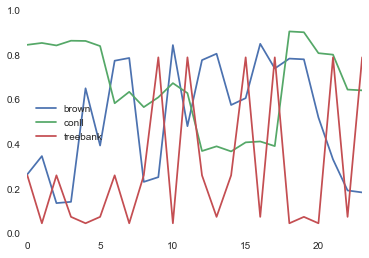

In [289]:
columns = ['brown', 'conll', 'treebank']
index = np.arange(24) # array of numbers for the number of samples
df = pd.DataFrame(columns=columns, index = index)
df['brown'] = brown_tag_res
df['conll'] = conll_tag_res
df['treebank'] = treebank_tag_res
df.plot();

let's take: baut, taub, tabu aka 10, 16 and 15

In [5]:
baut = [nltk.BigramTagger, nltk.AffixTagger, nltk.UnigramTagger, nltk.TrigramTagger]
taub = [nltk.TrigramTagger, nltk.AffixTagger, nltk.UnigramTagger, nltk.BigramTagger]
tabu = [nltk.TrigramTagger, nltk.AffixTagger, nltk.BigramTagger, nltk.UnigramTagger]
ntag = [baut,taub,tabu]

In [10]:
patterns = [
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),
    (r'.*ould$', 'MD'),
    (r'.*ing$', 'VBG'),
    (r'.*ed$', 'VBD'),
    (r'.*ness$', 'NN'),
    (r'.*ment$', 'NN'),
    (r'.*ful$', 'JJ'),
    (r'.*ious$', 'JJ'),
    (r'.*ble$', 'JJ'),
    (r'.*ic$', 'JJ'),
    (r'.*ive$', 'JJ'),
    (r'.*ic$', 'JJ'),
    (r'.*est$', 'JJ'),
    (r'^a$', 'PREP'),
]

In [304]:
def add_regex(cps, ptn, sqc):
    rfirst = []
    rlast = []
    for i in sqc:
        rfirst.append(backoff_tagger(cps, i, backoff=nltk.RegexpTagger(ptn)))
        bcf = backoff_tagger(cps, i)
        rlast.append(nltk.RegexpTagger(ptn, backoff=bcf))
    rfirst.extend(rlast)
    return rfirst

In [307]:
brown_tagger = add_regex(brown_train, patterns, ntag)
conll_tagger = add_regex(conll_train, patterns,ntag)
treebank_tagger = add_regex(treebank_train, patterns, ntag)

In [293]:
tagger_eval(brown_test, brown_tagger)

[0.8897608174549018,
 0.8318898395534793,
 0.7960824453659475,
 0.8484943922453765,
 0.7866603677847183,
 0.7567144331881092]

In [261]:
tagger_eval(conll_test, conll_tagger)

[0.9139922978177151,
 0.9182642732380731,
 0.8375702350638692,
 0.8694416970054084,
 0.8728508596561375,
 0.7923041309791873]

In [262]:
tagger_eval(treebank_test, treebank_tagger)

[0.8205915178571429,
 0.8226461038961039,
 0.5000253652597403,
 0.7787388392857143,
 0.7802607548701299,
 0.4504362824675325]

it seems that rbaut is the best tagger

In [11]:
rbaut_tagger = backoff_tagger(brown_train, baut, backoff=nltk.RegexpTagger(patterns))

In [12]:
rbaut_tagger.evaluate(brown_test)

0.8897608174549018

In [15]:
pickle.dump(rbaut_tagger, open('rbaut_tagger.p', 'wb'))